<a href="https://colab.research.google.com/github/jesronithin/dog_and_cat_classification_using_svm/blob/main/dog_and_cat_classification_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:05<00:00, 199MB/s]
100% 812M/812M [00:05<00:00, 148MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg', 'dog.9510.jpg', 'cat.8130.jpg', 'dog.42.jpg', 'cat.1925.jpg', 'dog.162.jpg', 'dog.11545.jpg', 'dog.7583.jpg', 'cat.9976.jpg', 'cat.11491.jpg', 'cat.664.jpg', 'cat.11009.jpg', 'cat.17.jpg', 'dog.12105.jpg', 'dog.6152.jpg', 'dog.123.jpg', 'cat.2675.jpg', 'cat.11870.jpg', 'dog.575.jpg', 'cat.5914.jpg', 'dog.6742.jpg', 'dog.9460.jpg', 'dog.10028.jpg', 'cat.11627.jpg', 'dog.4743.jpg', 'dog.2081.jpg', 'dog.1223.jpg', 'dog.8037.jpg', 'cat.174.jpg', 'dog.7438.jpg', 'cat.9648.jpg', 'cat.11819.jpg', 'dog.2343.jpg', 'cat.9692.jpg', 'cat.9796.jpg', 'cat.4963.jpg', 'cat.5789.jpg', 'dog.10914.jpg', 'dog.7664.jpg', 'dog.10451.jpg', 'cat.1353.jpg', 'dog.10738.jpg', 'cat.6060.jpg', 'cat.12208.jpg', 'cat.4326.jpg', 'dog.9151.jpg', 'cat.807.jpg', 'dog.2239.jpg', 'cat.6939.jpg', 'dog.10372.jpg', 'cat.5056.jpg', 'cat.12393.jpg', 'dog.1720.jpg', 'cat.6825.jpg', 'cat.10165.jpg', 'cat.12471.jpg', 'dog.7850.jpg', 'cat.9644.jpg',

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

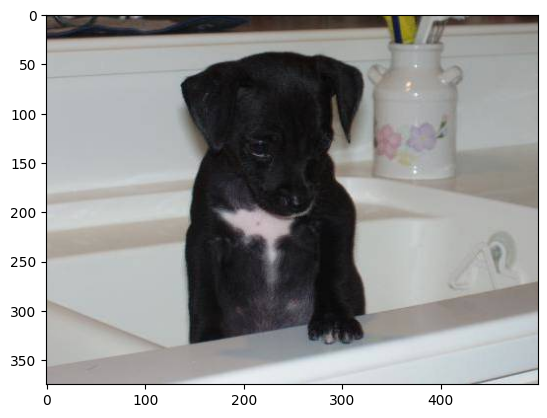

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

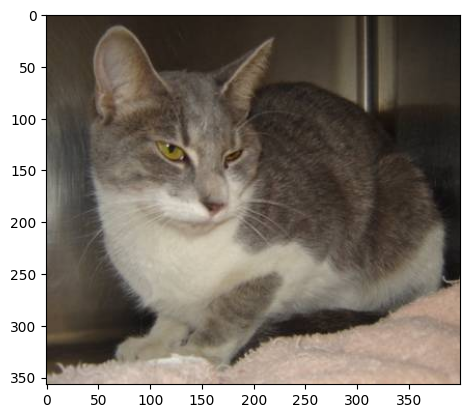

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
dog
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

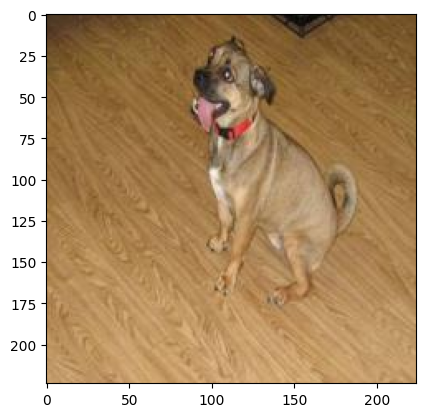

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10304.jpg')
imgplt = plt.imshow(img)
plt.show()

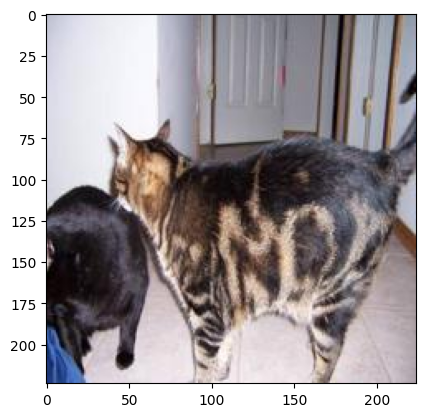

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.2485.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 978 1022]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 25  26  36]
   [ 20  21  31]
   [ 20  18  30]
   ...
   [ 39  67  68]
   [ 76 104 105]
   [ 52  80  80]]

  [[ 25  26  36]
   [ 20  21  31]
   [ 21  19  31]
   ...
   [ 53  81  82]
   [ 87 115 116]
   [113 144 143]]

  [[ 25  27  37]
   [ 20  22  32]
   [ 19  19  31]
   ...
   [ 58  88  89]
   [ 62  92  93]
   [116 148 147]]

  ...

  [[255 166 236]
   [255 167 237]
   [255 173 243]
   ...
   [255 253 255]
   [255 253 255]
   [255 254 255]]

  [[255 168 237]
   [255 166 235]
   [255 170 238]
   ...
   [255 252 255]
   [255 252 255]
   [255 253 255]]

  [[255 170 239]
   [255 166 235]
   [253 166 234]
   ...
   [255 252 255]
   [255 252 255]
   [255 253 255]]]


 [[[108  60  24]
   [102  58  27]
   [ 87  52  32]
   ...
   [ 13  21  20]
   [  7  15  14]
   [  6  14  13]]

  [[105  57  21]
   [101  57  26]
   [ 89  54  34]
   ...
   [ 19  27  26]
   [ 10  18  17]
   [  6  14  13]]

  [[106  59  21]
   [104  61  28]
   [ 95  58  36]
   ...
   [ 27  33  32]
   [ 12  20  19]
   [  6  14

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.36078431 0.35294118 0.37647059]
   [0.36078431 0.35294118 0.37647059]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.41568627 0.40392157 0.41176471]
   [0.42352941 0.41176471 0.41960784]
   [0.42745098 0.41568627 0.42352941]]

  [[0.36078431 0.35294118 0.37647059]
   [0.35686275 0.34901961 0.37254902]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.41960784 0.40784314 0.41568627]
   [0.41960784 0.40784314 0.41568627]
   [0.42352941 0.41176471 0.41960784]]

  [[0.36078431 0.35294118 0.37647059]
   [0.35686275 0.34901961 0.37254902]
   [0.35294118 0.34509804 0.36862745]
   ...
   [0.42352941 0.41176471 0.41960784]
   [0.41960784 0.40784314 0.41568627]
   [0.41960784 0.40784314 0.41568627]]

  ...

  [[0.45098039 0.44313725 0.44313725]
   [0.4627451  0.45490196 0.45490196]
   [0.47058824 0.4627451  0.4627451 ]
   ...
   [0.14117647 0.14901961 0.14901961]
   [0.10196078 0.10980392 0.10980392]
   [0.09803922 0.10588235 0.10588235]]

  [[0.43921569 0.43137255 0.43137255]
   [0.4

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 56s 1s/step - loss: 0.2211 - acc: 0.9087
Epoch 2/5
50/50 [==============================] - 57s 1s/step - loss: 0.0763 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 54s 1s/step - loss: 0.0547 - acc: 0.9806
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0455 - acc: 0.9825
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.0364 - acc: 0.9869


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 1s/step - loss: 0.0907 - acc: 0.9750
Test Loss = 0.0906669870018959
Test Accuracy = 0.9750000238418579


**Predictive System**

Path of the image to be predicted: /content/image resized/cat.1025.jpg


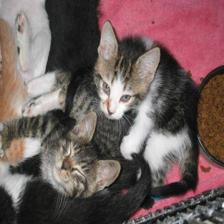

1/1 [==============================] - 1s 884ms/step
[[ 5.143454  -2.8081086]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/image resized/cat.9821.jpg


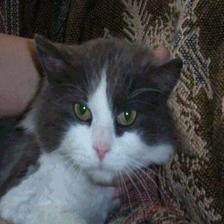

1/1 [==============================] - 0s 103ms/step
[[ 4.5800576 -4.4814177]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')